# YOLO Object Detection

## resources
- https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/
- https://www.learnopencv.com/deep-learning-based-object-detection-using-yolov3-with-opencv-python-c/
- https://github.com/spmallick/learnopencv/tree/master/ObjectDetection-YOLO

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
!ls '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'

armstrong-pame.jpg	    find_waldo.jpg     Messi-01.jpg  road-01.png
brad-pitt.jpg		    image-room.jpg     Messi-02.jpg  road-02.png
Children-crossing-road.jpg  keanu-reeves.jpg   Messi-03.jpg  road-03.png
dog-01.jpg		    license-plate.jpg  Messi-04.jpg  waldo.PNG


## Get model

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O ./yolov3.cfg
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O ./coco.names

--2019-10-07 13:33:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  52.7MB/s    in 4.5s    

2019-10-07 13:33:43 (52.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2019-10-07 13:33:44--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2019-10-07 13:33:45--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awai

## Show Class Name

### show class name using linux command

In [77]:
!cat /content/coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


### search object_class using GREP

In [78]:
!cat /content/coco.names | grep 'person'

person


In [92]:
!cat /content/coco.names | grep 'p'

person
aeroplane
stop sign
parking meter
sheep
elephant
backpack
sports ball
cup
spoon
apple
pizza
pottedplant
laptop
cell phone


### show class name using pandas

In [85]:
import pandas as pd

file_path = '/content/coco.names'
data = pd.read_csv(file_path, header=None)
data.columns = ["object_class"]

data

,object_class
0,person
1,bicycle
2,car
3,motorbike
4,aeroplane
5,bus
6,train
7,truck
8,boat
9,traffic light


### search object_class using pandas

In [91]:
search = 'person'
data.loc[data['object_class'] == search]

,object_class
0,person


## Example of YOLO object detection

In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []

with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
# Loading image
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'armstrong-pame.jpg'
img = cv2.imread(img_loc)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

print('height', height, 'width', width, 'channels', channels)

height 233 width 350 channels 3


In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

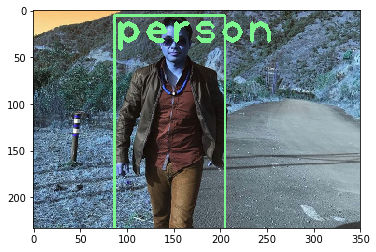

In [0]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

plt.imshow(img)
plt.show()
#cv2.imshow("Image", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Create function of YOLO Object Detection

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image using OpenCV
def read_img(img_loc):
  img = cv2.imread(img_loc)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape

  return img, height, width

#YOLO object detection
def detect_object(img, height, width, object_class='person'):
  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  cnt = 0

  #font = cv2.FONT_HERSHEY_PLAIN
  font = cv2.FONT_HERSHEY_SIMPLEX
  for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        if str(classes[class_ids[i]]) == object_class:
          cnt += 1
          label = str(classes[class_ids[i]])
          color = colors[i]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
          cv2.putText(img, label, (x, y + 30), font, 0.4, color, 1)
        else:
          pass

  print('Number of Objects', cnt)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()

Number of Objects 1


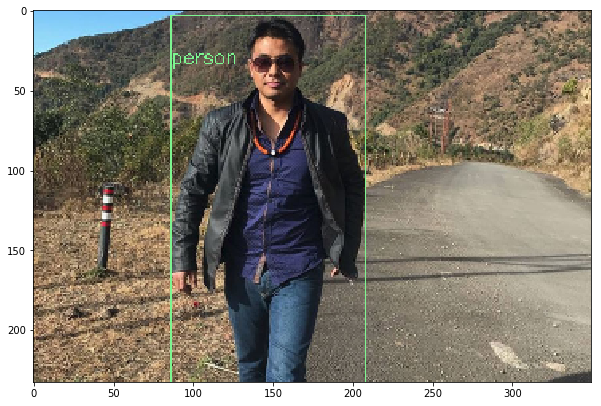

([[86, 3, 122, 231]], array([[0]], dtype=int32))

In [111]:
# Loading image
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'armstrong-pame.jpg'
img, height, width = read_img(img_loc)

person_img = np.array(img, copy=True)
detect_object(person_img, height, width)

Number of Objects 2


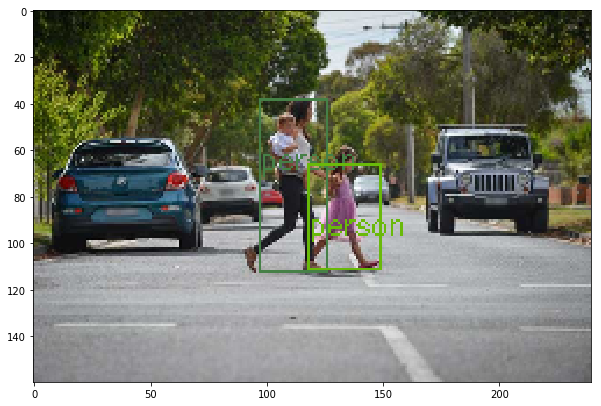

Number of Objects 1


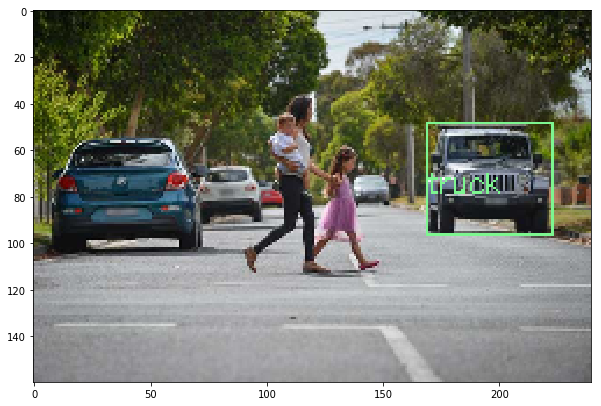

Number of Objects 2


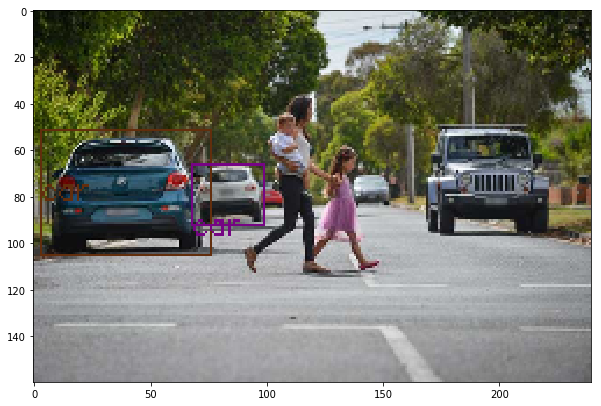

In [108]:
# Loading image
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'Children-crossing-road.jpg'
img, height, width = read_img(img_loc)

person_img = np.array(img, copy=True)
detect_object(person_img, height, width)

truck_img = np.array(img, copy=True) 
detect_object(truck_img, height, width, object_class='truck')

car_img = np.array(img, copy=True) 
detect_object(car_img, height, width, object_class='car')

Number of Objects 3


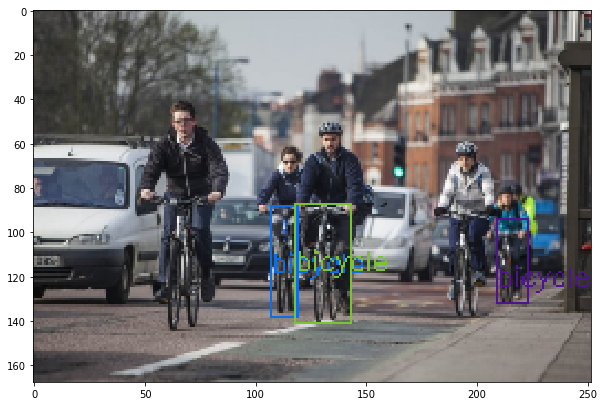

Number of Objects 4


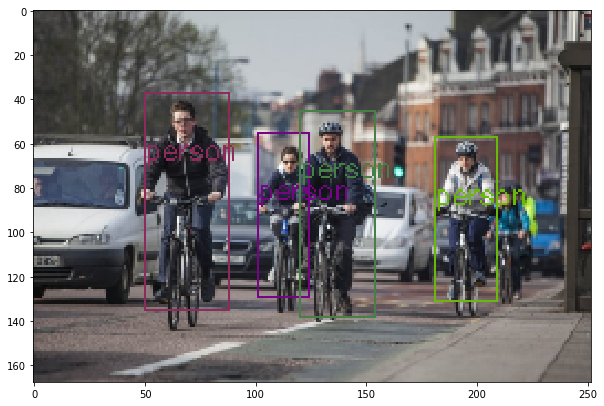

In [109]:
# Loading image
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'cycling_commuting_4850746-630x420.jpg'
img, height, width = read_img(img_loc)
detect_object(img, height, width, object_class='bicycle')

img, height, width = read_img(img_loc)
person_img = np.array(img, copy=True) 
detect_object(img, height, width, object_class='person')

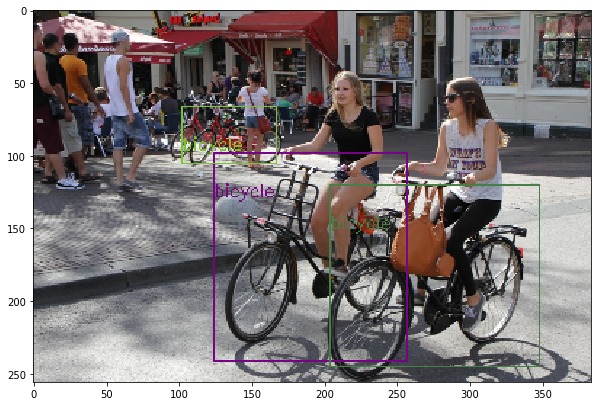

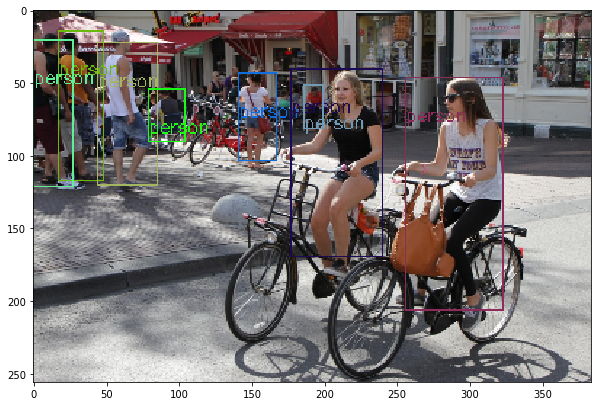

In [102]:
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'DutchReview_cycling_bicycle_bike.jpg'
img, height, width = read_img(img_loc)
detect_object(img, height, width, object_class='bicycle')

img, height, width = read_img(img_loc)
person_img = np.array(img, copy=True) 
detect_object(img, height, width, object_class='person')

### Show Objects

In [0]:
#YOLO object detection
def detect_object(img, height, width, object_class='person', object_crop=True):

  tmp_img = np.array(img, copy=True)
  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  cnt = 0

  #font = cv2.FONT_HERSHEY_PLAIN
  font = cv2.FONT_HERSHEY_SIMPLEX
  for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        if str(classes[class_ids[i]]) == object_class:
          cnt += 1
          label = str(classes[class_ids[i]])
          color = colors[i]
          if(crop_object):
            plt.imshow(tmp_img[y:y+h,x:x+w])
            plt.show()
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
          cv2.putText(img, label, (x, y + 30), font, 0.4, color, 1)
        else:
          pass

  print('Number of Objects', cnt)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()


Bicycle


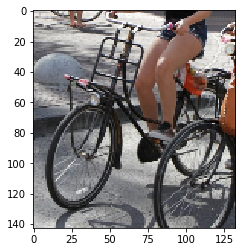

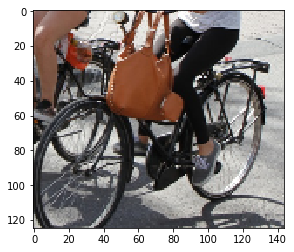

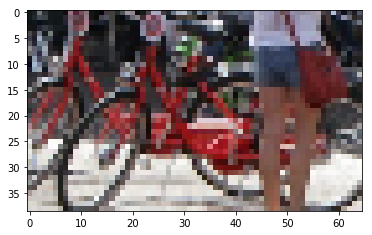

Number of Objects 3


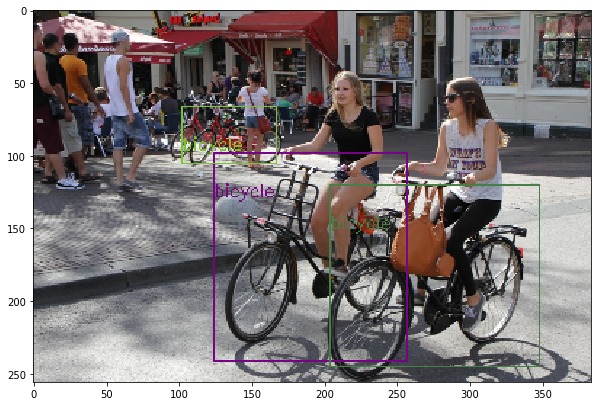

In [120]:
loc = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
img_loc = loc + 'DutchReview_cycling_bicycle_bike.jpg'

print('Bicycle')
img, height, width = read_img(img_loc)
detect_object(img, height, width, object_class='bicycle')

Person


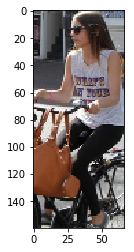

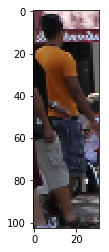

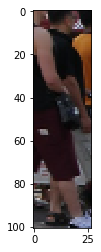

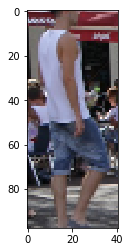

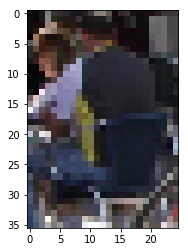

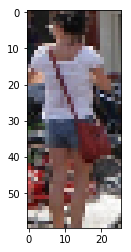

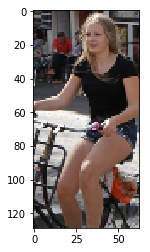

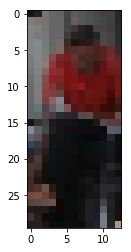

Number of Objects 8


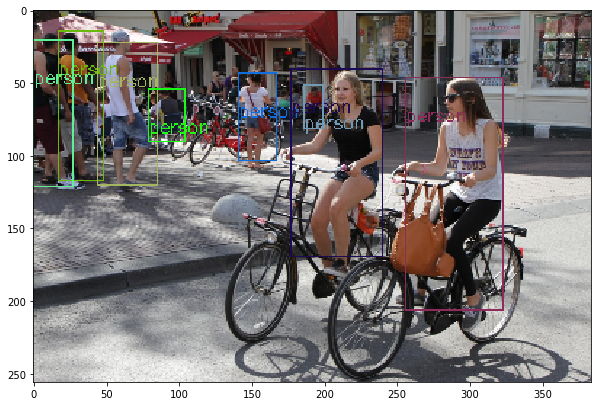

In [122]:
print('Person')
img, height, width = read_img(img_loc)
detect_object(img, height, width, object_class='person', object_crop=True)